# EvaGeM Tutorial

You can run the full tutorial once you have defined this path: where to save the data used in the tutorial (Cifar10).

In [1]:
path_to_save_the_data = "data/Cifar10/data/"

## I. Data

This example uses Cifar10. To avoid dependencies, the generated synthetic dataset considered in this tutorial is a part of the real Cifar10 data and not generated. 

After loading, your data should consist of:
- `train_data`: the train data used to train your generative model.
- `test_data`: some real data unseen by the model.
- `gen_data`: the generated data. There should be the same number of samples as in `train_data`.

If your data has labels (necessary for some classification-based metrics), they should be given in arrays of shape `(number of samples, )`.

If you want to plot the name of each centroid in the UMAP, the class names should be provided in `classes` in the sorted order of their corresponding label. For instance, if `train_labels` is `["m", "f", "NA", "m", "m", "f"]`, `classes` should be `["Female", "Male", "NA"]`.


### I.1. Loading

In [2]:
import numpy as np
from torchvision import datasets

In [3]:
# Load the data
dataset = datasets.CIFAR10
dataset_train = dataset(root=path_to_save_the_data, train=True, download=True)
dataset_test = dataset(root=path_to_save_the_data, train=False, download=True)

# Compatibility with the classifier used later on
train_gen_data = dataset_train.data.astype(np.float32)
train_gen_data = np.transpose(train_gen_data, (0, 3, 1, 2))
train_gen_labels = np.array(dataset_train.targets)
test_data = dataset_test.data.astype(np.float32)
test_data = np.transpose(test_data, (0, 3, 1, 2))
test_labels = np.array(dataset_test.targets)

# Classes
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

100%|██████████| 170498071/170498071 [00:06<00:00, 26787015.62it/s]


Extracting data/Cifar10/data/cifar-10-python.tar.gz to data/Cifar10/data/
Files already downloaded and verified


### I.2. Preprocessing

Your data should be standardized or preprocessed in the same way it was given to your generative model.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
# Reshape the data for the scaler
shape = train_gen_data.shape
train_gen_data = train_gen_data.reshape(shape[0], -1)

# Scale the data
scaler = StandardScaler().fit(train_gen_data)
train_gen_data = scaler.transform(train_gen_data)
test_data = scaler.transform(test_data.reshape(test_data.shape[0], -1))

# Go back to the initial shape
train_gen_data = train_gen_data.reshape(shape)
test_data = test_data.reshape((test_data.shape[0],) + shape[1:])

### I.3. Data splitting

Split the data into train, test and generated datasets. In this tutorial the generated data is a part of the real Cifar10 dataset.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_data, generated_data, train_labels, generated_labels = train_test_split(
    train_gen_data, train_gen_labels, test_size=0.5, random_state=42
)

### II. Saving the results and reusing computations

You can save the results in `res_save_dir` with an `experiment_name`. The plots will be saved in the directory `res_save_dir/experiment_name/` and the numerical results in `res_save_dir/results.csv`. These 2 arguments can be given to any function that shows a plot. The numerical results are only saved if these arguments are used in the main function `main` (see below).

In [8]:
res_save_dir = None  # "../../../res" # With None the results will not be saved
experiment_name = "Tutorial"

To optimise the evaluation time, if you plan to evaluate different generated synthetic datasets with the same real dataset, some computations made on the real dataset can be stored instead of computed everytime. This is done through 4 arguments:
- `reusable_embeddings`: boolean for the UMAP and histogram of distances,
- `reusable_classif_baseline`: boolean for the classification baseline,
- `dataset_name`: the name of the real dataset. If it is not provided, nothing will be stored.
- `reusable_path`: where to store the reusable computations. It will be done in `reusable_path/dataset_name`.

You can delete manually the precomputations whenever you want, for instance if you change your classifier for the same dataset. 

In [9]:
reusable_embeddings = True
reusable_classif_baseline = True
dataset_name = "Cifar10"
reusable_path = None  # "../../../reusable" # With None the reusable computations will not be saved

## II. Quickstart

You can either evaluate your generated synthetic data through the function `evaluate_all` or through individual functions for each measure. In this tutorial, we start with `evaluate_all` and detail the parameters and outputs with the individual functions.

The main parameter that you will have to change from default in practice is the classifier used for the classification-based metrics. See the related section bellow.

In [10]:
from EvaGeM.evaluate_all import evaluate_all

/home/nicolas/anaconda3/envs/nov12py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Generated data: Min: -2.2074292 Max: 2.625075


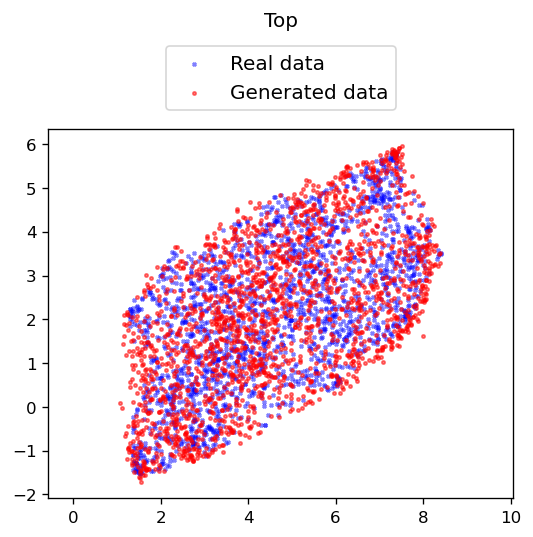

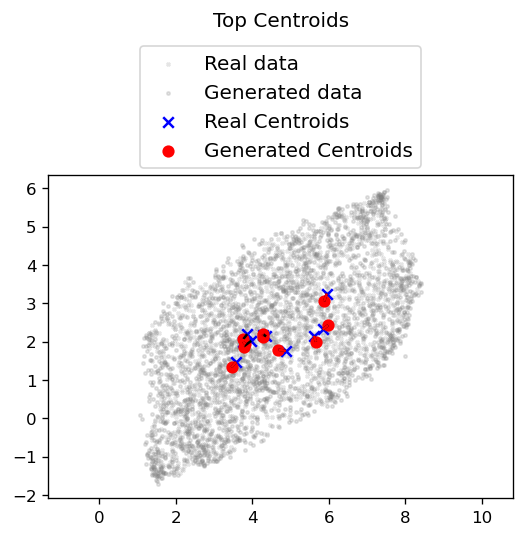

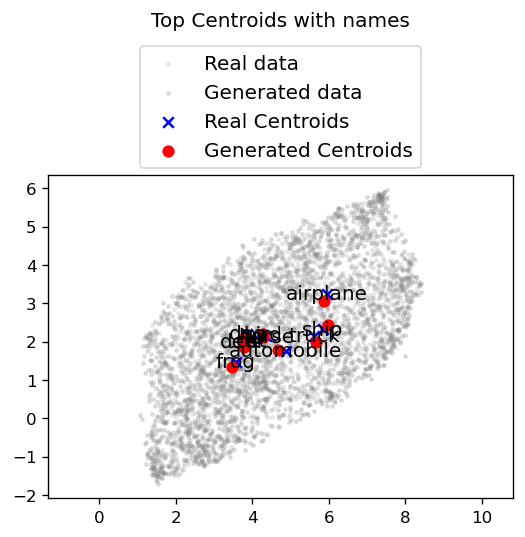

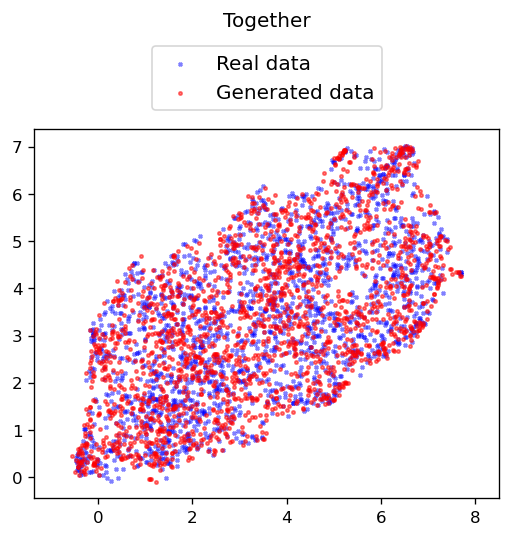

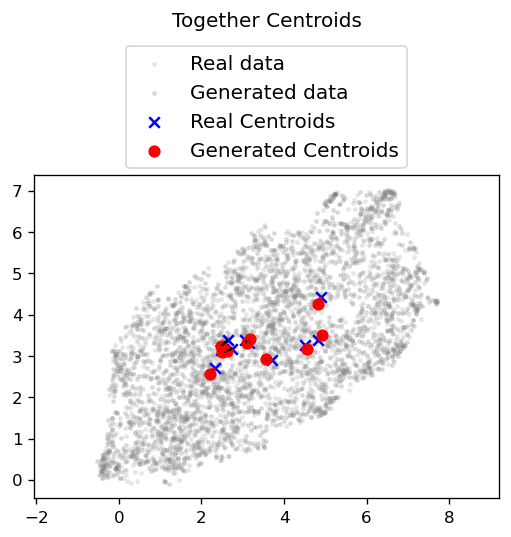

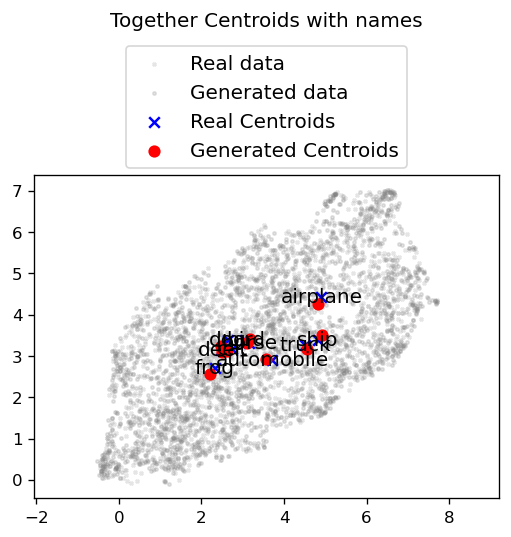

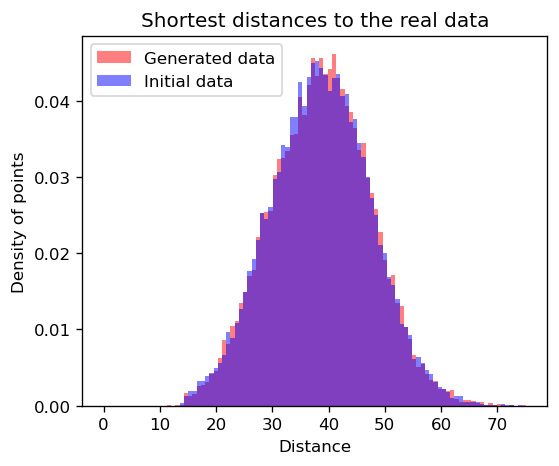

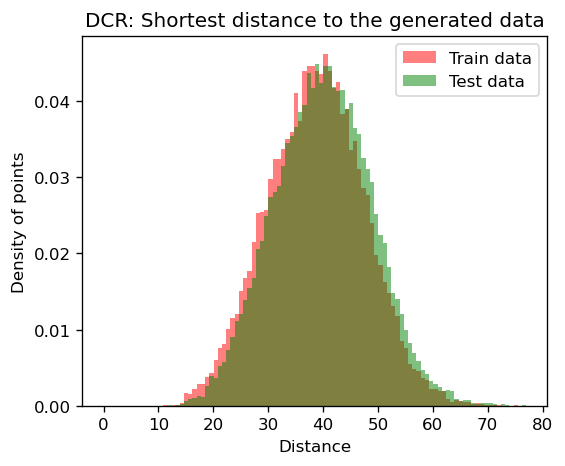

Distance score: 0.9966
DCR score: 0.9877
Alpha-Precision: 0.9938
Beta-Recall: 0.9951
The chosen r value for the identifiability score is 0.896
Identifiability: 0.0452
Training the baseline...
   Training the model: MLPClassifier


/home/nicolas/anaconda3/envs/nov12py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


      Accuracy: 0.4632
   Training the model: XGBClassifier
      Accuracy: 0.4258
Baseline accuracy: 0.4445
Training the GAN-train classifier...
   Training the model: MLPClassifier


/home/nicolas/anaconda3/envs/nov12py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


      Accuracy: 0.4711
   Training the model: XGBClassifier
      Accuracy: 0.4202
GAN-train accuracy: 0.44565
Training the GAN-test classifier.
   Training the model: MLPClassifier


/home/nicolas/anaconda3/envs/nov12py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


      Accuracy: 0.4686
   Training the model: XGBClassifier
      Accuracy: 0.4199
GAN-test accuracy: 0.4443
Training the discriminator classifier...
   Training the model: MLPClassifier


/home/nicolas/anaconda3/envs/nov12py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


      Accuracy: 0.5027
   Training the model: XGBClassifier
      Accuracy: 0.4959
Discriminator accuracy: 0.4993
Training the data augmentation classifier...
   Training the model: MLPClassifier


/home/nicolas/anaconda3/envs/nov12py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


      Accuracy: 0.5053
   Training the model: XGBClassifier
      Accuracy: 0.4348
Data augmentation accuracy: 0.47

Results:
   alpha-precision: 0.9938
   beta-recall: 0.9951
   identifiability: 0.0452
   distance_score: 0.9966
   DCR_score: 0.9877
   classification_baseline: 0.4445
   GAN_train: 0.4456
   GAN_test: 0.4443
   data_augmentation: 0.47
   discriminator: 0.4993
   Min: -2.2074
   Max: 2.6251


In [11]:
_ = evaluate_all(
    # Data
    train_data=train_data,
    test_data=test_data,
    generated_data=generated_data,
    # Labels
    train_labels=train_labels,
    test_labels=test_labels,
    generated_labels=generated_labels,
    # List of Classes
    classes=classes,
    # Optional scaler to be inverted before the UMAPs
    scaler=scaler,
    ####### Optional parameters to save the results
    res_save_dir=res_save_dir,
    experiment_name=experiment_name,
    ####### Optional booleans to choose which measures to compute
    compute_UMAP_top=True,
    compute_UMAP_together=True,
    compute_UMAP_centroids=True,
    compute_distrib_based_alpha=True,
    compute_distrib_based_beta=True,
    compute_distrib_based_identifiability=True,
    compute_distrib_based_distance_histogram=True,
    compute_distrib_based_DCR=True,
    compute_classif_based_GAN_train=True,
    compute_classif_based_GAN_test=True,
    compute_classif_based_data_augmentation=True,
    compute_classif_based_discriminator=True,
    ####### Optional parameters for the reusable computations
    reusable_embeddings=reusable_embeddings,
    reusable_classif_baseline=False,  # False before the classifier is changed
    dataset_name=dataset_name,
    reusable_path=reusable_path,
    ####### Optional parameters of the measures, explained below
    # UMAP_limit = 2000,
    # distrib_based_metrics_n_evaluated_points = 50,
    # distrib_identif_ref_leaked_proportion=0.05,
    distrib_based_n_jobs=2,  # Default # The number of jobs to use for the
    # computation of the distribution-based metrics
    # classifiers = [MLPClassifier, XGBClassifier],  # Should be imported
    # classifier_params = [{"max_iter": 10}, {"n_estimators": 10}],
    # classifiers_should_flatten = [True, True],
)

## III. In details

### III.1. Distribution based metrics

See the readme for a more detailed explanation of the metrics.

In [12]:
from EvaGeM.distribution_based import (
    alpha_precision,
    beta_recall,
    identifiability,
)
from EvaGeM.histograms import histograms

#### $\alpha$-Precision and $\beta$-Recall

Both the $\alpha$-Precision and $\beta$-Recall functions have a parameter `number_of_alphas`/`number_of_betas`, which determines how many $\alpha$ or $\beta$ values are used for the integral estimation (the higher the number, the better the estimation).

In [13]:
alpha_precision(
    real_data=train_data,
    generated_data=generated_data,
    number_of_alphas=50,  # Default value
    n_jobs=2,  # Default value  # The number of jobs to use for the computation
    # will be faster with more jobs
)

0.9940043824

In [14]:
beta_recall(
    real_data=train_data,
    generated_data=generated_data,
    number_of_betas=50,  # Default value
    n_jobs=2,  # Default value  # The number of jobs to use for the computation
    # will be faster with more jobs
)

0.9953040992

These two results are extremely high because the generated data considered here is part of the real data, hence the high quality and coverage.

#### Identifiability

The identifiability metric requires an additional dataset: a reference dataset of real data, which is used to set the level `reference_leaked_proportion` of identifiability that can be considered normal.

The `filter_leaky_generated` boolean decides if `identifiability` returns the indices of the generated data samples that are considered too close to the real data.

In [15]:
identifiability_value, leaky_generated = identifiability(
    real_data=train_data,
    reference_real_data=test_data,
    generated_data=generated_data,
    reference_leaked_proportion=0.05,  # Default value
    filter_leaky_generated=True,
    n_jobs=2,  # Default value  # The number of jobs to use for the computation
    # will be faster with more jobs
)

print("Identifiability:", identifiability_value)

The chosen r value for the identifiability score is 0.896
Identifiability: 0.0452


Here the identifiability score is almost the same as the reference value, indicating no data leakage. We could still remove the data that is close to the real data:

In [16]:
filtered_generated_data = generated_data[~leaky_generated]
filtered_generated_data.shape

(24177, 3, 32, 32)

#### Histogram of distances and Distance to Closest Records (DCR)

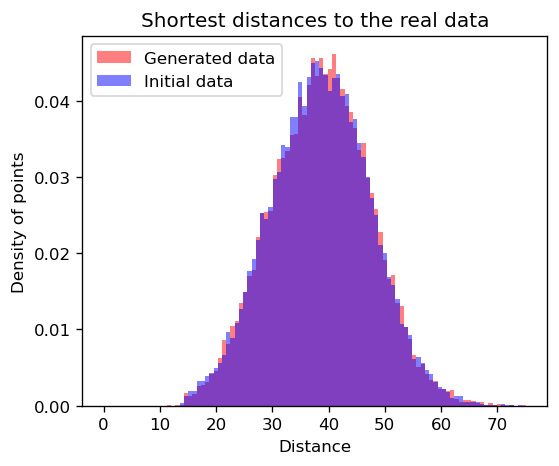

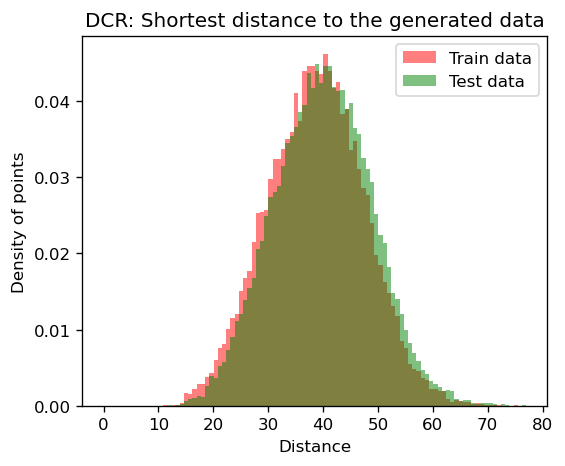

{'distance_score': 0.99664, 'DCR_score': 0.9877}

In [17]:
histograms(
    train_data=train_data,
    test_data=test_data,
    generated_data=generated_data,
    ####### Optional parameters to save the results
    res_save_dir=res_save_dir,
    experiment_name=experiment_name,
    ####### Optional booleans to choose which measures to compute
    compute_distance_histogram=True,
    compute_DCR=True,
    ####### Optional parameters for the reusable computations
    reusable_histogram_embedding=reusable_embeddings,
    dataset_name=dataset_name,
    reusable_path=reusable_path,
    ####### Number of jobs to use
    n_jobs=2,
)

The two scores are very high, indicating that in both plots, the histograms closely match.
In the histogram of distances, the red histogram represents the distances from each real data point to their closest generated data point. In the DCR histogram, the red histogram shows the distances from every generated data point to the closest training data point. Although these histograms are closely related, they are not identical: in the histogram of distances, a single generated point can be the closest point to many real points, while in the DCR histogram, each generated point has only one closest real point.

### III.2. Classification based

In [18]:
from EvaGeM.classification_based import classification_scores

#### Using a custom classifier

Classification-based metrics rely on training and evaluation a classifier on different datasets to draw conclusions about the data. For the conclusions to be reliable, you need to use a sufficiently good classifier for your data. You can provide multiple classifiers for the evaluation, and their accuracy scores will be averaged to yield a more accurate result.

The code works with any Scikit-learn-compatible classifier. Here is a short example showing how to make your PyTorch classifier compatible with Scikit-learn through Skorch.

If you do not have different classes in your data, you can still use the discriminator score.

In [19]:
from torch import nn
import torch
from skorch import NeuralNetClassifier

Here we use a very simple Convolutional Neural Network. For the classification of Cifar10 better-performing classifiers are available and should be used instead of this one. 

In [20]:
class SmallCNN(nn.Module):
    def __init__(self):
        super(SmallCNN, self).__init__()

        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # output: 64 x 16 x 16
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # output: 128 x 8 x 8
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # output: 256 x 4 x 4
            nn.Flatten(),
            nn.Linear(256 * 4 * 4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, xb):
        return self.network(xb)

If CUDA is not available, you can either reinstall PyTorch using the command from the official [PyTorch website](https://pytorch.org/get-started/locally/) or skip the next section if training is too slow on CPU.

In [21]:
torch.cuda.is_available()

True

In [22]:
# classifier should be this specific NeuralNetClassifier
classifier = NeuralNetClassifier

classifier_param = {
    "module": SmallCNN,  # You put your specific model here
    # Parameters to train the model
    "max_epochs": 15,
    "lr": 0.001,
    "optimizer": torch.optim.AdamW,
    "criterion": nn.CrossEntropyLoss,
    "iterator_train__shuffle": True,
    "device": torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    "train_split": None,
}

In [23]:
classification_scores(
    # Data
    train_data=train_data,
    test_data=test_data,
    generated_data=generated_data,
    # Labels
    train_labels=train_labels,
    test_labels=test_labels,
    generated_labels=generated_labels,
    # Which metric to compute
    compute_GAN_train=True,
    compute_GAN_test=True,
    compute_data_augmentation=True,
    compute_discriminator=True,
    ####### Optional parameters for the reusable computations
    reusable_baseline=reusable_classif_baseline,
    dataset_name=dataset_name,
    reusable_path=reusable_path,
    # YOUR classifiers as a list
    classifiers=[classifier],
    # their corresponding parameters as a list of dictionnaries
    classifier_params=[classifier_param],
    # Should the data be flattened before being fed to the classifier? as a
    # list corresponding to the classifiers
    classifiers_should_flatten=[False],
)

Training the baseline...
   Training the model: NeuralNetClassifier
  epoch    train_loss     dur
-------  ------------  ------
      1        1.7745  3.2275
      2        1.3499  2.2944
      3        1.0629  2.3103
      4        0.8600  2.2974
      5        0.6970  2.3296
      6        0.5559  2.3515
      7        0.4450  2.3685
      8        0.3279  2.3208
      9        0.2361  2.3177
     10        0.1741  2.3177
     11        0.1555  2.3265
     12        0.1109  2.3324
     13        0.1166  2.3330
     14        0.0765  2.3396
     15        0.0850  2.3451
      Accuracy: 0.7385
Baseline accuracy: 0.7385
Training the GAN-train classifier...
   Training the model: NeuralNetClassifier
  epoch    train_loss     dur
-------  ------------  ------
      1        1.7392  2.3516
      2        1.2811  2.3551
      3        1.0209  2.3571
      4        0.8489  2.3581
      5        0.7113  2.3677
      6        0.5936  2.3849
      7        0.4928  2.3764
      8        0.3886  

{'baseline': 0.7385,
 'GAN_train': 0.7275,
 'GAN_test': 0.73168,
 'DA': 0.7911,
 'discriminator': 0.5}

The baseline is not that high due to the choice of model and the amount of data used for training (half of it was allocated to the generated dataset in this example, leaving very little for training). As expected, the discriminator struggles to differentiate between the real and generated synthetic data. The GAN_train and GAN_test accuracy scores are close to the baseline, while the Data Augmentation score improves on the baseline, indicating high quality, diversity, and conditionality of the generated data. 

### III.3. UMAPs

UMAPs are mainly useful for assessing the coverage and visualising the global structure of the data.

There are two kinds of UMAPs:
- "Top": The UMAP embedding is computed for the real data, and the generated data is projected onto this representation.
- "Together": The embedding is computed for both the real and generated data together.

The `umaps` function has a few specific arguments:
- `scaler`: If a scaler is provided, it will be inverted before computing the UMAPs.
- `UMAP_limit`: The maximum number of points to use for the UMAPs (it can be very slow with too many points).

In [24]:
from EvaGeM.umaps import umaps

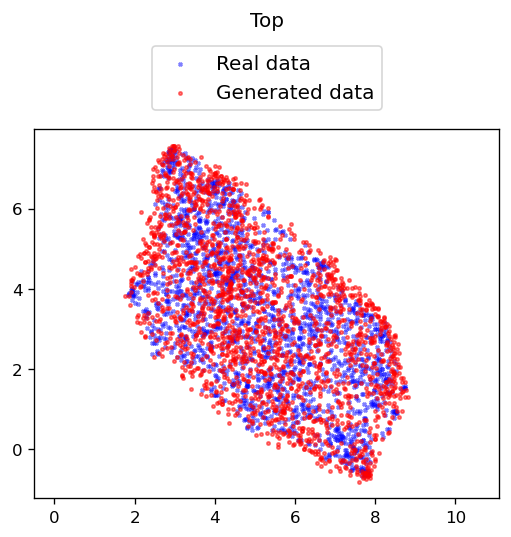

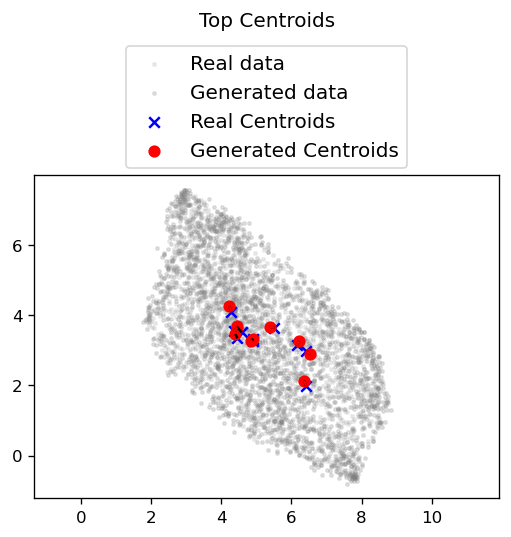

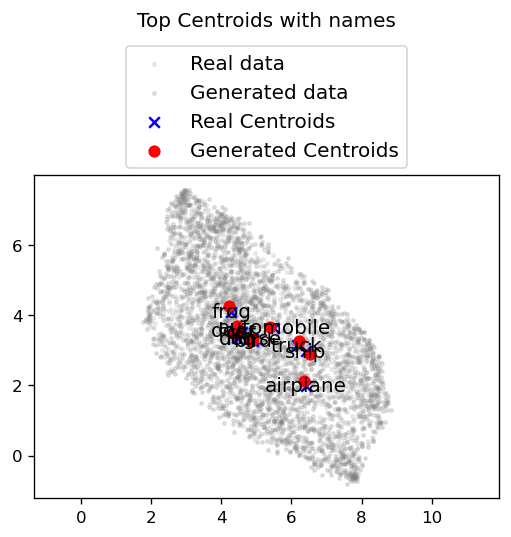

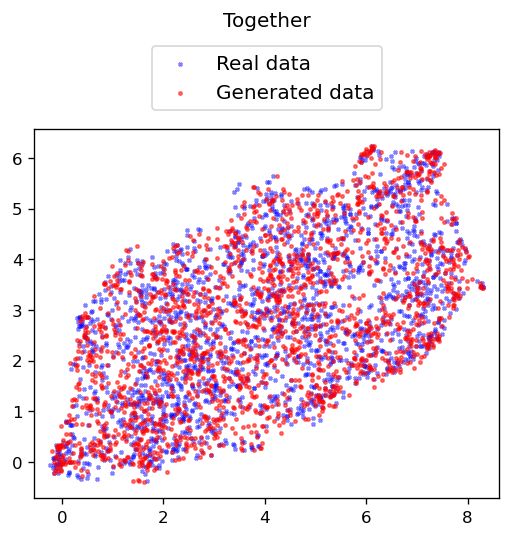

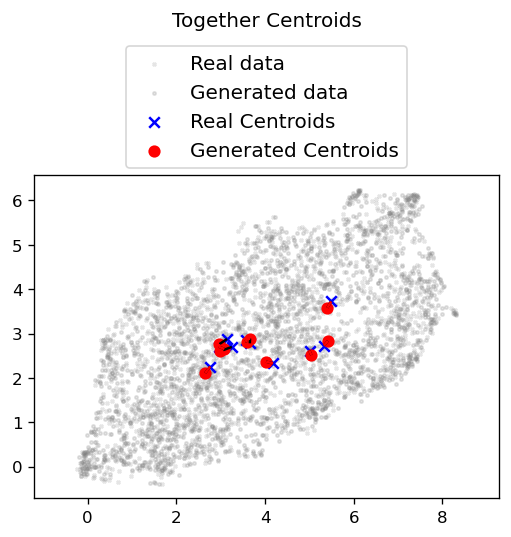

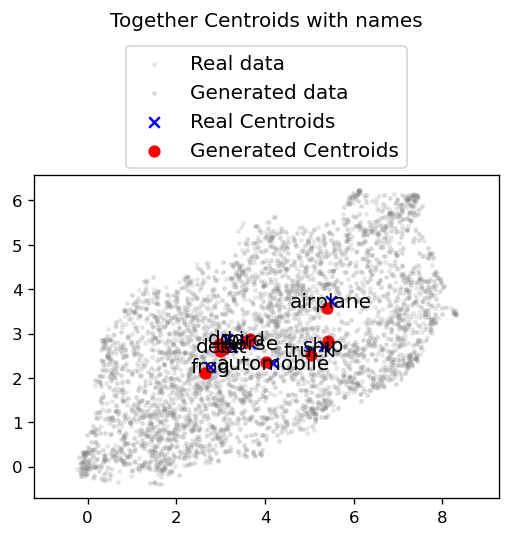

In [25]:
umaps(
    # Data
    train_data=train_data,
    generated_data=generated_data,
    # Labels
    train_labels=train_labels,
    generated_labels=generated_labels,
    # Classes
    classes=classes,
    # The scaler to invert before computing the UMAPs
    scaler=scaler,
    ####### Optional parameters to save the results
    res_save_dir=res_save_dir,
    experiment_name=experiment_name,
    # Which UMAPs to compute
    compute_UMAP_top=True,
    compute_UMAP_together=True,
    compute_UMAP_centroids=True,
    ####### Optional parameters for the reusable computations
    reusable_UMAP_embedding=reusable_embeddings,
    dataset_name=dataset_name,
    reusable_path=reusable_path,
    # The maximum amount of points to compute the UMAPs on
    UMAP_limit=2000,  # Default
)